In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**Load Data**

In [2]:
df=pd.read_csv("Rainfall.csv")

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


**Cleaning Data**

In [5]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [6]:
df.rename(columns={'         winddirection': 'winddirection'}, inplace=True)
df['winddirection']=df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed']=df['windspeed'].fillna(df['windspeed'].mean())

In [7]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [8]:
df['rainfall']=df['rainfall'].map({'yes':1,'no':0})

In [9]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**Exploration and Visualization**

In [10]:
df.shape

(366, 12)

In [11]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [12]:
sns.set(style='whitegrid')

In [13]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

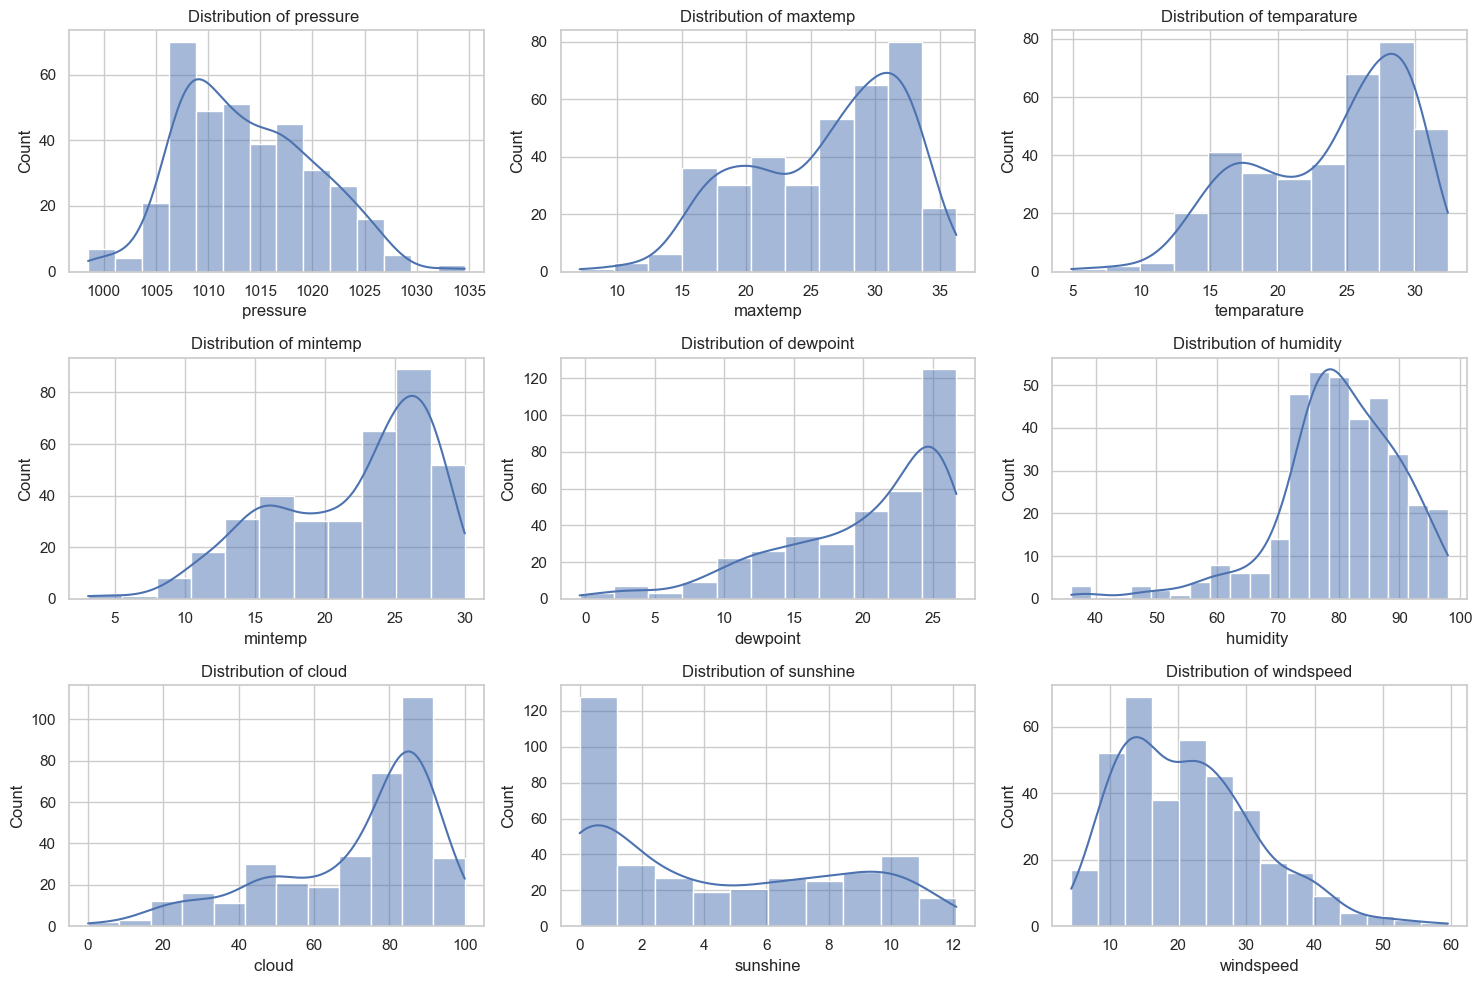

In [14]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint','humidity ', 'cloud ', 'sunshine' , 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

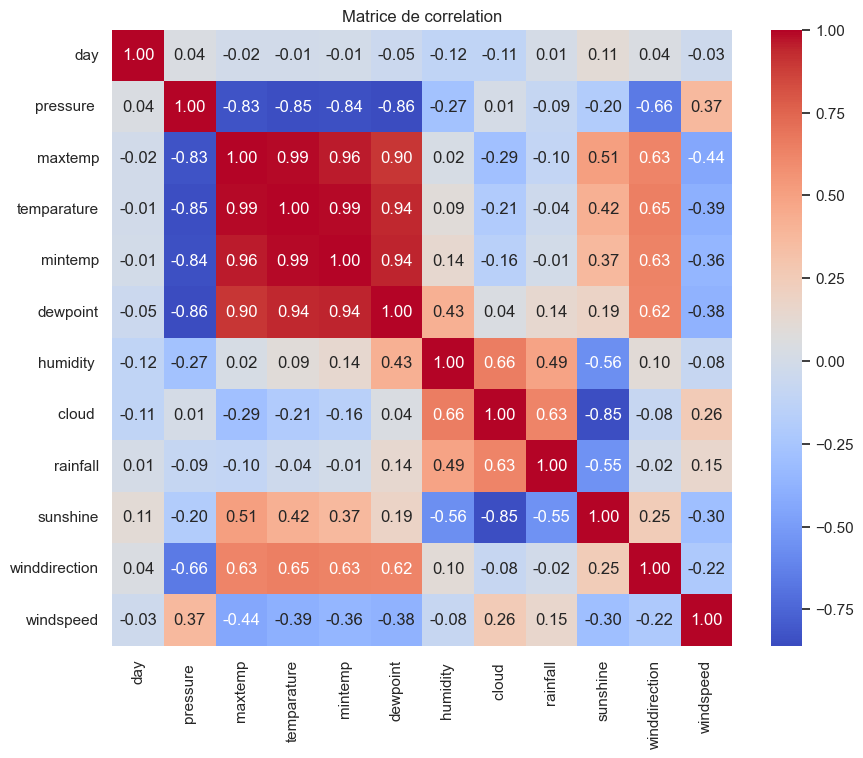

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Matrice de correlation")
plt.show()

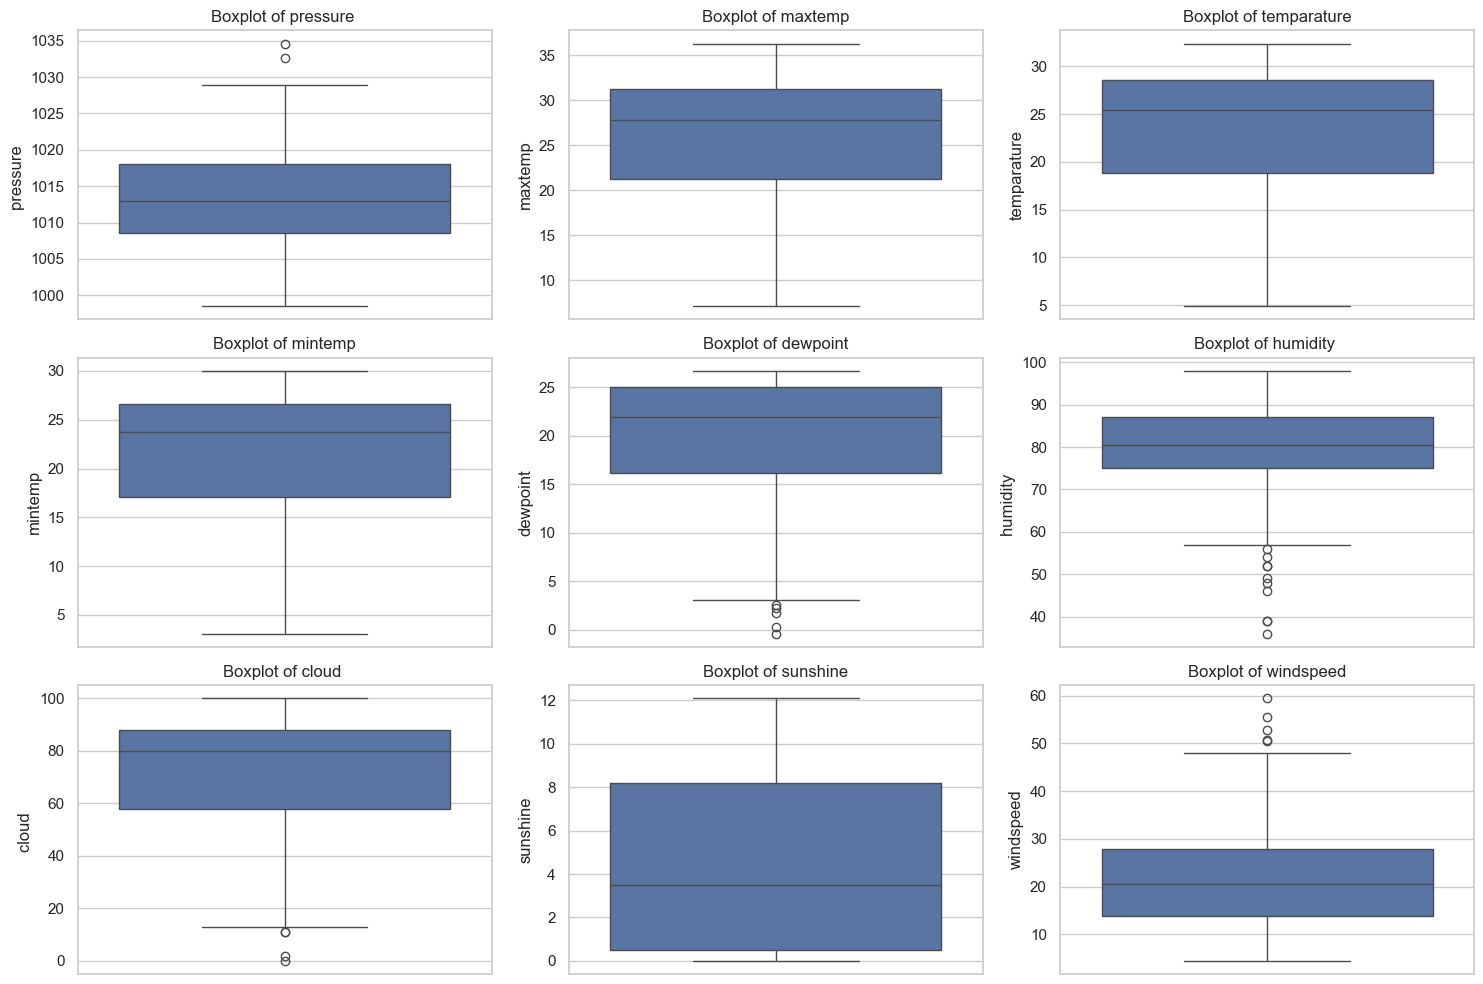

In [16]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint','humidity ', 'cloud ', 'sunshine' , 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [17]:
df=df[['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'winddirection',
       'windspeed', 'rainfall']]

In [18]:
df[[ 'maxtemp', 'temparature', 'mintemp', 'dewpoint']].corr()


,maxtemp,temparature,mintemp,dewpoint
maxtemp,1.000000,0.986193,0.961534,0.899829
temparature,0.986193,1.000000,0.990187,0.936866
mintemp,0.961534,0.990187,1.000000,0.944515
dewpoint,0.899829,0.936866,0.944515,1.000000


In [19]:
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

**Feature Selection**

In [20]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

Method 1 : LDA

In [21]:
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_result = lda.fit_transform(X, Y)
lda.get_feature_names_out()

array(['lineardiscriminantanalysis0'], dtype=object)

Method 2 : RFE

In [22]:
model=RandomForestClassifier()
rfe = RFE(estimator=model,n_features_to_select=3)
X_rfe=rfe.fit_transform(X,Y)
print("Features selected par RFE : ",X.columns[rfe.get_support()])

Features selected par RFE :  Index(['dewpoint', 'cloud ', 'sunshine'], dtype='object')


In [23]:
model.fit(X,Y)
importance=model.feature_importances_
print(dict(zip(X.columns,importance)))

{'day': np.float64(0.08319202821859399), 'pressure ': np.float64(0.08936881775631256), 'dewpoint': np.float64(0.08480001791137735), 'humidity ': np.float64(0.13308661430662924), 'cloud ': np.float64(0.2620537363109293), 'sunshine': np.float64(0.19836064410636842), 'winddirection': np.float64(0.05467934508999947), 'windspeed': np.float64(0.09445879629978961)}


Method 3 : PCA 

In [24]:
scaler=preprocessing.StandardScaler()
scaled=scaler.fit_transform(X)
normalized_df = pd.DataFrame(scaled, columns=X.columns)

In [25]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(normalized_df)
print(pca.explained_variance_ratio_)

[0.35284725 0.30863622]


In [ ]:
X=X[['humidity ', 'cloud ', 'sunshine']]

In [27]:
normalized_df.head()

,humidity,cloud,sunshine
0,-0.813795,-1.016547,1.242193
1,0.081842,0.545363,-0.972100
2,1.475055,0.912872,-1.124810
3,0.977479,0.775056,-0.870293
4,1.475055,0.453486,-1.124810


**Models**

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(normalized_df , Y, test_size=0.3,random_state=4444)

In [33]:
models={
    "KNN":KNeighborsClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB(),
    "SVM Linear":SVC(kernel="linear",probability=True),
    "SVM Gaussian":SVC(kernel="rbf",probability=True)
}

In [35]:
from sklearn.model_selection import cross_val_score
for name,model in models.items():
    cv_scores=cross_val_score(model,X_train,Y_train,cv=5,scoring="accuracy")
    print(f"{name} accuracy mean : {cv_scores.mean():.4f}")

KNN accuracy mean : 0.7735
DecisionTree accuracy mean : 0.7070
Naive Bayes accuracy mean : 0.7812
SVM Linear accuracy mean : 0.8044
SVM Gaussian accuracy mean : 0.8006
